  Creating, Reading and Writing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load Titanic dataset from Seaborn or url
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.shape

(891, 12)

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic_df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [8]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Select specific rows,columns,and assign values

In [10]:
## Select a column
titanic_df['Name'].head(10)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


In [13]:
# Select a row by index
titanic_df.loc[0]

,0
PassengerId,1
Survived,0
Pclass,3
Name,"Braund, Mr. Owen Harris"
Sex,male
Age,22.0
SibSp,1
Parch,0
Ticket,A/5 21171
Fare,7.25


In [18]:
# Assign new column
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] +1
titanic_df[['Name','FamilySize']].head()

,Name,FamilySize
0,"Braund, Mr. Owen Harris",2
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2
2,"Heikkinen, Miss. Laina",1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2
4,"Allen, Mr. William Henry",1


Summary Functions and Maps


In [19]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [21]:
# use map to transform data

titanic_df['SexNumeric']=titanic_df['Sex'].map({'male':0,'female':1})
titanic_df[['Sex','SexNumeric']].head(8)

,Sex,SexNumeric
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
5,male,0
6,male,0
7,male,0


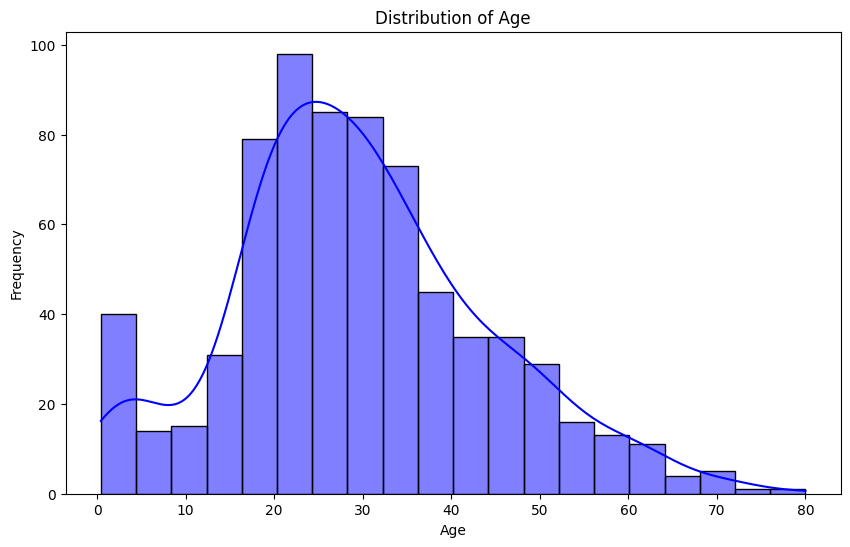

In [32]:
# Visualization: Distribution of age
plt.figure(figsize=(10,6))
sns.histplot(titanic_df['Age'],bins=20,kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

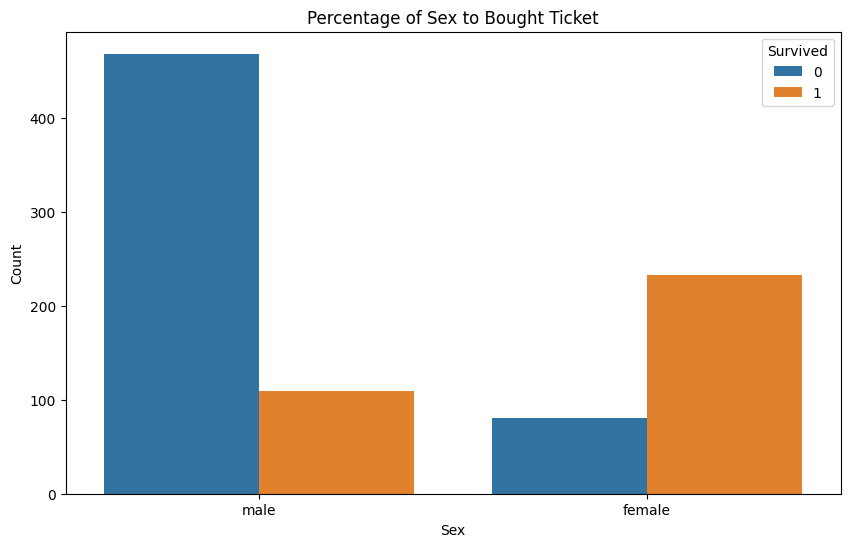

In [34]:
# visulization perctange of sex to  bought ticket in pichart
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Percentage of Sex to Bought Ticket')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


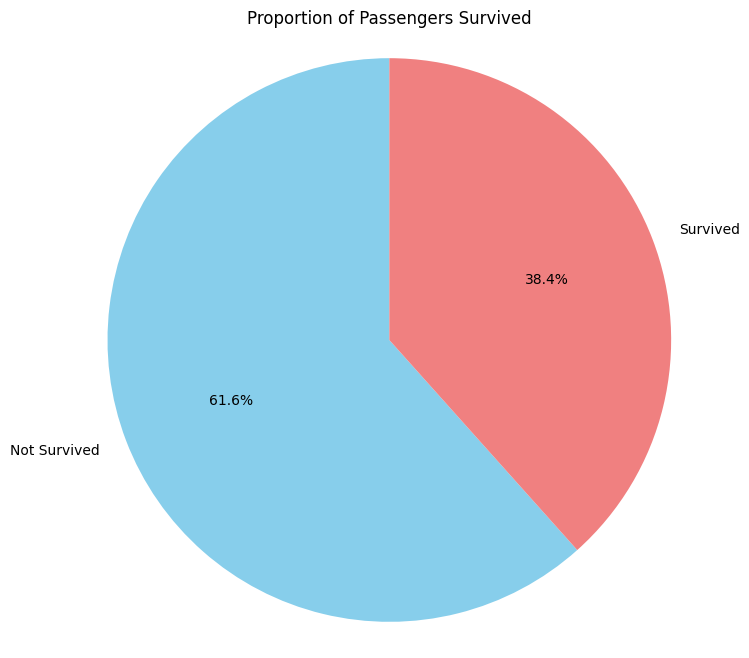

In [35]:
# Create a pie chart for the 'Survived' column
survived_counts = titanic_df['Survived'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Passengers Survived')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Grouping and Sorting
Group Similar data and sort values

In [36]:
# Sorting by Fare
titanic_df.sort_values(by='Fare',ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,SexNumeric
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2,0
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1,1
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,6,0
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,6,1


In [39]:
# Grouping by Pclass and calculating survival rate

titanic_df.groupby('Pclass')['Survived'].mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [42]:
titanic_df.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

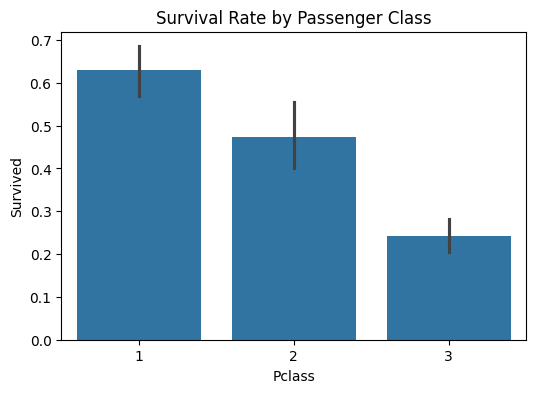

In [44]:
# 📊 Visualization: Survival Rate by Class
plt.figure(figsize=(6,4))
sns.barplot(data=titanic_df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.show()

#Data types and Missing Values


In [45]:
print(titanic_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
FamilySize       int64
SexNumeric       int64
dtype: object


In [46]:
# Check for missing values
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
SexNumeric       0
dtype: int64


In [47]:
# Fill the missing age with mean
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)

In [48]:
# Fill Embarked with mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0],inplace=True)

In [49]:
titanic_df.drop('Cabin',axis=1,inplace=True)

In [50]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Renaming and Combining

In [51]:
# Rename sex to gender
titanic_df.rename(columns={'Sex':'Gender'},inplace=True)
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,SexNumeric
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,2,0


In [52]:
# Combine with a new DataFrame (simulated example)
extra_passenger = pd.DataFrame({
    'PassengerId': [1000],
    'Survived': [0],
    'Pclass': [3],
    'Name': ['Test Passenger'],
    'Gender': ['male'],
    'Age': [25],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [7.25]
})
titanic_df = pd.concat([titanic_df, extra_passenger], ignore_index=True)
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,SexNumeric
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,S,1.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,S,4.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C,1.0,0.0
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,Q,1.0,0.0
891,1000,0,3,Test Passenger,male,25.000000,0,0,NaN,7.25,NaN,NaN,NaN


File handling and Manipulation


In [53]:
# Save to csv
titanic_df.to_csv('titanic_modified.csv',index=False)

In [56]:

# Read from CSV
reloaded_df = pd.read_csv('/content/titanic_modified.csv')
reloaded_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,SexNumeric
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2.0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0,0.0


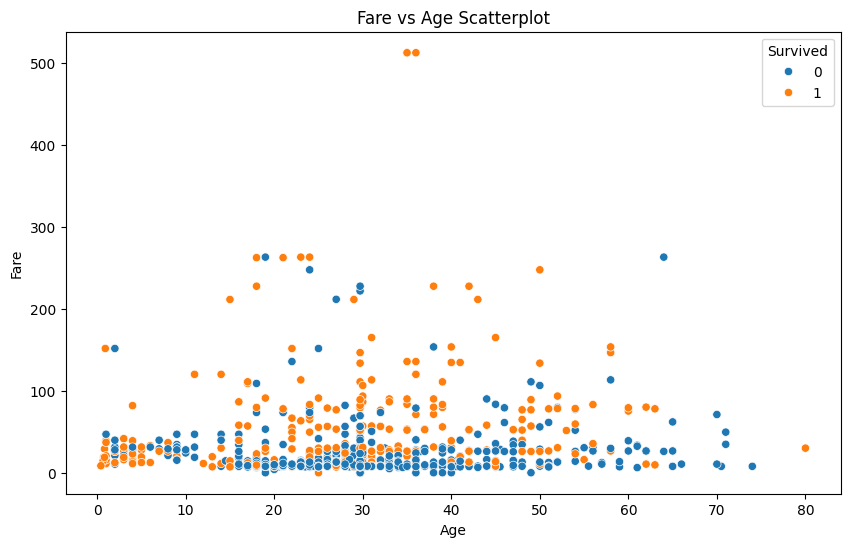

In [57]:
# Visulization : Fare vs age Scatterplot

plt.figure(figsize=(10,6))
sns.scatterplot(data=titanic_df,x='Age',y='Fare',hue='Survived')
plt.title('Fare vs Age Scatterplot')
plt.show()

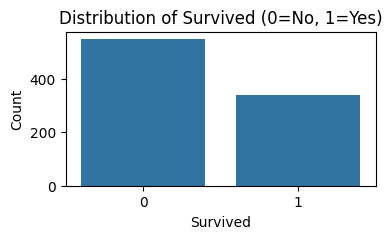

In [61]:
plt.figure(figsize=(4,2))
sns.countplot(data=titanic_df,x='Survived')
plt.title('Distribution of Survived (0=No, 1=Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

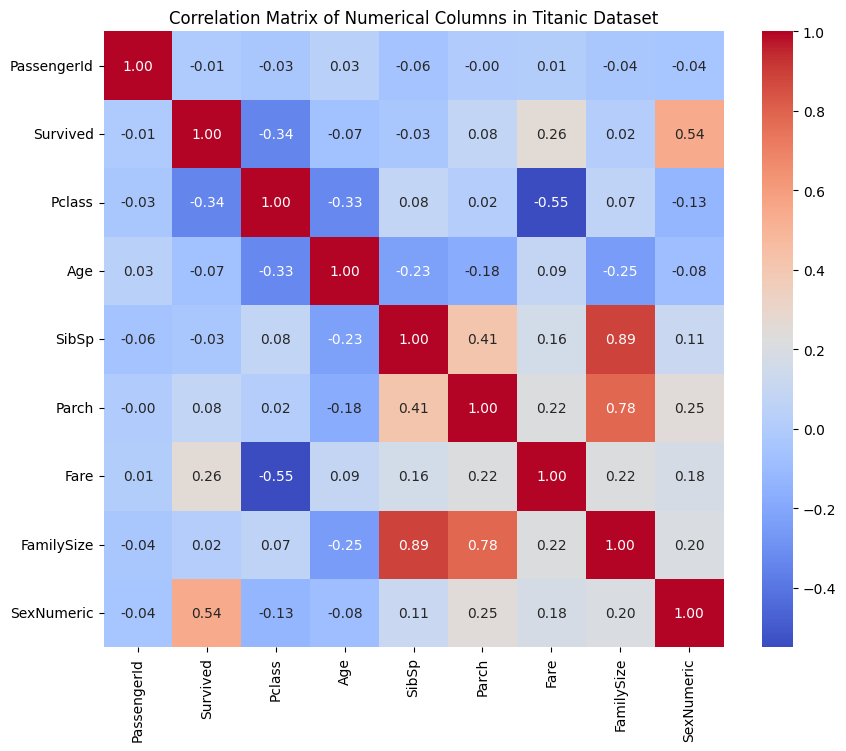

In [62]:
# Select only numerical columns
numerical_df = titanic_df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns in Titanic Dataset')
plt.show()